## Bitcoin Price Prediction
### Name: Enriquez, Manolo & Narvaez, Richard
### Section: S12

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Bitcoin.csv')

print(df)

       SNo        Date    Price     Open     High      Low     Vol.  Change %
0        1  2010-07-18      0.1      0.0      0.1      0.1     80.0      0.00
1        2  2010-07-19      0.1      0.1      0.1      0.1    570.0      0.00
2        3  2010-07-20      0.1      0.1      0.1      0.1    260.0      0.00
3        4  2010-07-21      0.1      0.1      0.1      0.1    580.0      0.00
4        5  2010-07-22      0.1      0.1      0.1      0.1   2160.0      0.00
...    ...         ...      ...      ...      ...      ...      ...       ...
4051  4052  2021-08-20  49324.0  46756.7  49343.3  46646.8  83190.0      5.49
4052  4053  2021-08-21  48875.8  49330.0  49719.1  48293.5  18200.0     -0.91
4053  4054  2021-08-22  49254.5  48870.4  49480.3  48151.0  49320.0      0.77
4054  4055  2021-08-23  49539.7  49255.4  50498.8  49038.6  75370.0      0.58
4055  4056  2021-08-24  49768.2  49532.5  49847.4  48812.4  61160.0      0.46

[4056 rows x 8 columns]


<AxesSubplot:xlabel='Date'>

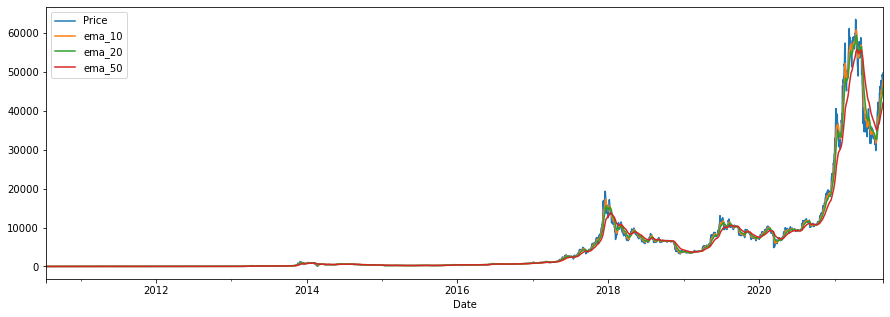

In [2]:
# Trim dataframe
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True) 
trim_df = df.loc[:, ['Price']]

# Calculate for EMA 10
trim_df['ema_10'] = trim_df['Price'].ewm(span=10, adjust=False).mean()

# Calculate for EMA 20
trim_df['ema_20'] = trim_df['Price'].ewm(span=20, adjust=False).mean()

# Calculate for EMA 50
trim_df['ema_50'] = trim_df['Price'].ewm(span=50, adjust=False).mean()

trim_df.plot(figsize=(15,5))

Packages to be used to train the model and visualize the data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Predicting using EMA 10

In [5]:
X_train, X_test, y_train, y_test = train_test_split(trim_df[['ema_10']], trim_df[['Price']], test_size=0.2, shuffle=False)

ema10_model = LinearRegression()
ema10_model.fit(X_train, y_train)

y_pred = ema10_model.predict(X_test)

result = y_test.copy()
result['Predicted Price'] = y_pred
result

,Price,Predicted Price
Date,,
2019-06-05,7779.1,8202.257290
2019-06-06,7784.9,8133.007705
2019-06-07,7985.2,8112.916899
2019-06-08,7901.4,8081.179946
2019-06-09,7635.0,8006.577798
...,...,...
2021-08-20,49324.0,46329.018971
2021-08-21,48875.8,46829.427115
2021-08-22,49254.5,47307.989659


Model Coefficients: [[1.00411233]]
Mean Absolute Error: 925.6977613651204
Coefficient of Determination: 0.9904489511444644


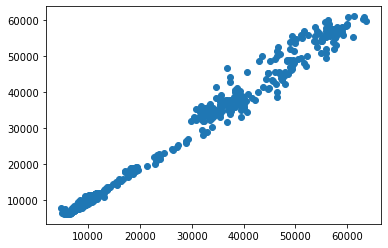

In [7]:
print("Model Coefficients:", ema10_model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.show()

Predicting using EMA 20

In [8]:
X_train, X_test, y_train, y_test = train_test_split(trim_df[['ema_20']], trim_df[['Price']], test_size=0.2, shuffle=False)

ema20_model = LinearRegression()
ema20_model.fit(X_train, y_train)

y_pred = ema20_model.predict(X_test)

result = y_test.copy()
result['Predicted Price'] = y_pred
result

,Price,Predicted Price
Date,,
2019-06-05,7779.1,8053.209768
2019-06-06,7784.9,8034.150804
2019-06-07,7985.2,8036.123082
2019-06-08,7901.4,8029.868036
2019-06-09,7635.0,7998.651198
...,...,...
2021-08-20,49324.0,44593.031191
2021-08-21,48875.8,45036.110564
2021-08-22,49254.5,45473.323093


Model Coefficients: [[1.00733432]]
Mean Absolute Error: 1432.040205021632
Coefficient of Determination: 0.9776663968065499


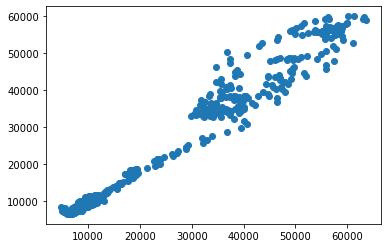

In [9]:
print("Model Coefficients:", ema20_model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.show()

Predicting using EMA 50

In [13]:
X_train, X_test, y_train, y_test = train_test_split(trim_df[['ema_50']], trim_df[['Price']], test_size=0.2, shuffle=False)

ema50_model = LinearRegression()
ema50_model.fit(X_train, y_train)

y_pred = ema50_model.predict(X_test)

result = y_test.copy()
result['Predicted Price'] = y_pred
result

,Price,Predicted Price
Date,,
2019-06-05,7779.1,7185.003864
2019-06-06,7784.9,7213.753338
2019-06-07,7985.2,7249.332918
2019-06-08,7901.4,7280.188007
2019-06-09,7635.0,7299.249528
...,...,...
2021-08-20,49324.0,41491.389595
2021-08-21,48875.8,41807.253688
2021-08-22,49254.5,42125.775982


Model Coefficients: [[1.01306636]]
Mean Absolute Error: 2663.113922107835
Coefficient of Determination: 0.9321358977595404


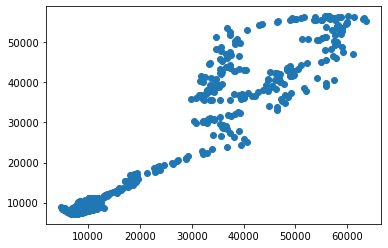

In [14]:
print("Model Coefficients:", ema50_model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.show()